In [1]:
from rockpool.devices.dynapse.quantize.weight_handler import WeightHandler
from rockpool.devices.dynapse.quantize.autoencoder import autoencoder_quantization
import numpy as np
from copy import deepcopy

from __future__ import annotations
import logging

from typing import Any, Callable, Dict, Optional, Tuple, Union

import numpy as np
from copy import deepcopy

# JAX
from jax import numpy as jnp
from jax import jit, value_and_grad
from jax.lax import scan, cond
from rockpool.nn.modules.jax.jax_module import JaxModule
from jax.example_libraries import optimizers


# Rockpool
from rockpool.training import jax_loss as l
from rockpool.devices.dynapse.quantize.weight_handler import WeightHandler
from rockpool.devices.dynapse.definitions import ArrayLike, WeightRecord

import matplotlib.pyplot as plt

/Users/ugurcancakal/rockpool/lib/python3.10/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
# np.random.seed(2022)
w_in = np.random.normal(size=(3, 4))
w_rec = np.random.normal(size=(4, 4))

w_in[1,2] = 0
w_rec[2,3] = 0


In [3]:
w_in

array([[ 0.37673898, -0.02521078, -0.02518564,  0.09741167],
       [ 0.42731533,  0.50688876,  0.        , -0.05213318],
       [-0.65395007, -0.07031549,  0.92342607, -0.16016535]])

In [4]:
w_rec

array([[ 1.45060131, -1.05171792,  1.0860522 , -1.46137138],
       [ 0.49064709, -0.30835288,  0.29762151, -1.82400035],
       [-0.85537342,  0.55679224,  1.30134922,  0.        ],
       [-0.95513006, -0.05260742, -1.34513196, -0.1011775 ]])

In [5]:
# spec, loss_t = autoencoder_quantization(w_in, w_rec, 1, 4, fixed_epoch=True, num_epoch=int(1e5))
spec, loss_t = autoencoder_quantization(w_in, w_rec, 1, 4, fixed_epoch=False)
spec

{'weights_in': array([[ 2,  0,  0,  0],
        [ 8,  5,  0,  0],
        [ 8,  0, 11,  2]], dtype=int32),
 'sign_in': array([[ 1., -1., -1.,  1.],
        [ 1.,  1.,  0., -1.],
        [-1., -1.,  1., -1.]]),
 'weights_rec': array([[15,  9, 14, 15],
        [ 6,  2,  8, 15],
        [14,  3, 13,  0],
        [11,  0, 15,  0]], dtype=int32),
 'sign_rec': array([[ 1., -1.,  1., -1.],
        [ 1., -1.,  1., -1.],
        [-1.,  1.,  1.,  0.],
        [-1., -1., -1., -1.]]),
 'Iw': DeviceArray([0.51850843, 0.3307641 , 0.23797469, 0.35975307], dtype=float32)}

In [6]:
w_res = WeightHandler.restore_weight_matrix(
    len(spec["Iw"]),
    spec["Iw"],
    spec["weights_rec"],
    spec["sign_rec"],
)
w_res


DeviceArray([[ 1.4470003 , -0.8782615 ,  0.9284919 , -1.4470003 ],
             [ 0.5687388 , -0.3307641 ,  0.35975307, -1.4470003 ],
             [-0.9284919 ,  0.84927255,  1.1162362 ,  0.        ],
             [-1.2090256 , -0.        , -1.4470003 , -0.        ]],            dtype=float32)

In [7]:
w_rec

array([[ 1.45060131, -1.05171792,  1.0860522 , -1.46137138],
       [ 0.49064709, -0.30835288,  0.29762151, -1.82400035],
       [-0.85537342,  0.55679224,  1.30134922,  0.        ],
       [-0.95513006, -0.05260742, -1.34513196, -0.1011775 ]])

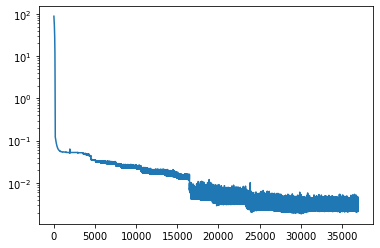

In [8]:
plt.semilogy(loss_t)

In [9]:
len(loss_t)

37000

DeviceArray(1.9488838, dtype=float32)

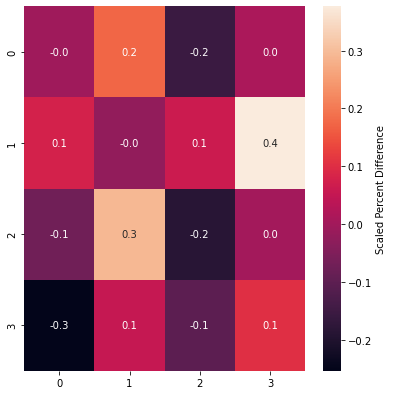

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [5.6, 5.6]
ax = sns.heatmap(data=w_res - w_rec, annot=True, fmt='.1f')
ax.collections[0].colorbar.set_label("Scaled Percent Difference")
plt.tight_layout()
# plt.savefig("fn_wrec_quantized_4.png", transparent="True", bbox_inches="tight")

np.sum(abs(w_res-w_rec))

In [11]:
loss_t[-1]

0.0026548775